# Classificacao

[**Titanic**: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)

Elaboracao de  uma  solucao utilizando dois algoritmos de aprendizagem de maquina para classificar se o passageiro tem ou nao  chance de sobreviver.

## Pre-processamento

- [ ] Identificar instancias com atributos incompletos
- [ ] Gerar matriz de correlacao
- [ ] Identificar a presenca de outliers e verificar se as classes estao balanceadas
- [ ] Ilustrar graficamente balanceamento (e.g. histograma)

**Dicas**

- A partir da analise da base de dados, para bons resultados possivelmente  sera necessariopre-processar os dados. Para identificar osoutliers, recomenda-se ilustra-los graficamente(e.g. boxplot). 
- Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%, respectivamente. 
- Para  analisar  os  resultados  de  cada  metrica,  identifique  os  falsos  positivos,  falsos negativos, verdadeiros positivos e verdadeiros negativos. 

**Bonus**

Altere dois parametros de cada algoritmo de aprendizagem de maquina utilizadosna questao e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e afuncao de distancia utilizada, alterar a funcao kernel do SVM, alterar a arquitetura da redeneural (e.x. camadas e funcao de ativacao, alterar o otimizador e a taxa de aprendizado).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Informações dos tipos dos atributos

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Podemos observar que a coluna Cabin tem uma grande quantidade de valores vazios. O mesmo podemos dizer de Age e Embarked, porem em proporções diferentes. 
#### 7 atributos já são numéricos e 5 são objetos (Strings)

### Descrição estatistica dos atributos

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Como observado na tabela acima podemos ver que existe um outlier de valor maximo muito acima da média do preço de cada bilhete

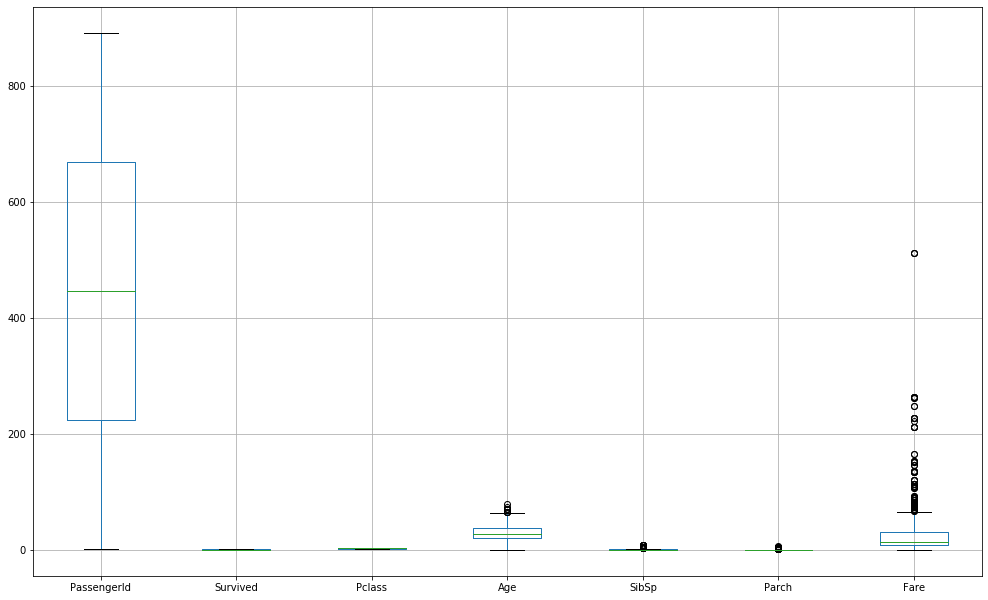

In [38]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
train_df.boxplot()

### Buscando os outliers de Fare para serem substituidos pela mediana

In [39]:
a = train_df.loc[train_df["Fare"] > 300]
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


#### Foram encontrados 3 outlieers e todos sobreviveram, logo podemos observar que quem pagou mais sobreviveu.. O dinheiro que manda!!

In [40]:
aux = np.array(train_df["Fare"])
train_df["Fare"] = train_df["Fare"].replace(512.3292, np.nanmedian(aux))

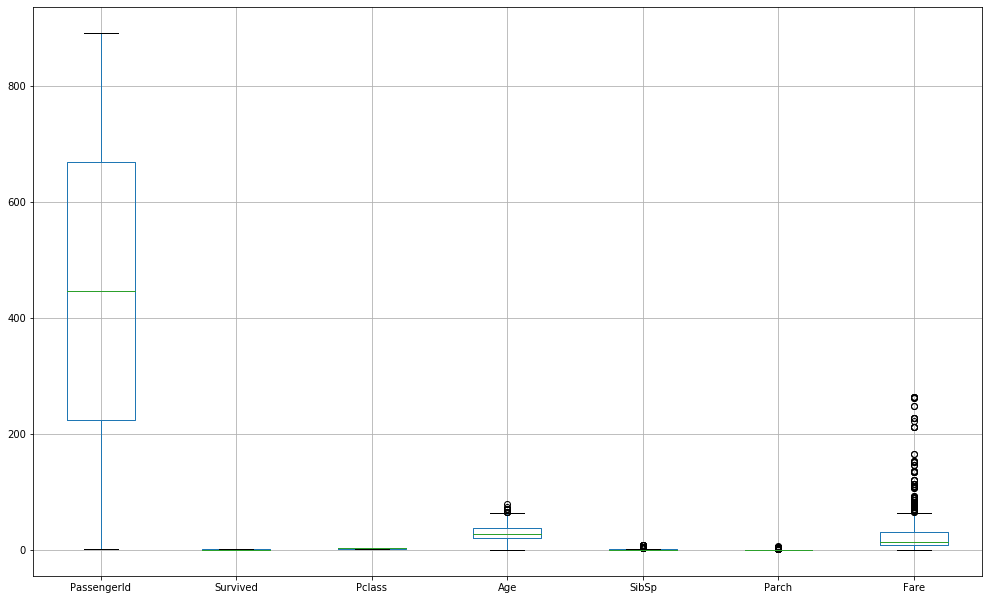

In [43]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
train_df.boxplot()

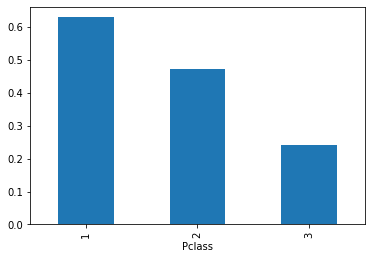

In [11]:
tmp = train_df.groupby('Survived').Pclass
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

## Treinamento

- [ ] Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discutaos  resultados  obtidos  em  ambos. Explique  porque  voce  acredita  que  os  algoritmos escolhidos sao mais apropriados para o problema
 - [ ] Definir e explicar metodos a serem utilizados
 - [ ] Aplicar metodos e visualizar resultado
- [ ] Analise  os  resultados  considerando  matriz  de  confusao,  especificidade,  sensibilidade,medida  f1  e  acuracia.  Descreva  detalhadamente  os  resultados  obtidos  por  cada  metrica,justificando a diferenca entre eles

# Regressao

[**House Prices:** Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Apresentacao de   duas   solucoes   de   aprendizagem   de maquina  que  consigam  baixas  taxas  de  erro  medio  

Prova de  que  esse  e  o  menor  valor  que  foi possivel encontrar

## Treinamento

- [ ] Teste  com  dois  algoritmos  de  aprendizagem  de  maquina  para  identificar  os que apresentam melhores resultados

# Clusterizacao

[**Premier League Data**](https://www.kaggle.com/thesiff/premierleague1819)

 Execute  os  algoritmos de clusterizacao citados a seguir e compare os resultados


## Treinamento
- [ ] Execute os algoritmos de agrupamento K-means e Hierarquico com os seguintes valores de K:2, 5, 10 e 100. Compare os agrupamento resultantes dos 2 algoritmos
  - [ ] Escolha  um  numero  fixo  de  K  e  altere  o  parametro  do  K-Means  referente  ao  numeromaximo  de  iteracoes:  1,  10  e  100  e  o  parametro  de  Linkage  do  Hierarquico,  quaisdiferencas puderam ser observadas?
  - [ ] Faca uma comparacao entre os 2 algoritmos, qual voce acha que teve o melhor desempenho e por que? 


**Bonus**

Normalizar  os  dados  e  executar  novamente  os  algoritmos  para  analisar  os  novos resultados gerados. Em seguida, fazer os graficos dos agrupamentos dos dados brutos vsdados normalizados, e um boxplot para mostrar a dispersao destes dados